Tarea 3 IA

Para comenzar se realizara la importacion del dataset al collab

In [1]:
!pip install kaggle -q
!pip install pandas -q

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/gdrive/MyDrive/Colab Notebooks/KaggleApiCredentials'

In [4]:
%cd /content/gdrive/MyDrive/Colab Notebooks/dataset
!ls

/content/gdrive/MyDrive/Colab Notebooks/dataset
amazon_laptop_prices_v01.csv			  heart-disease-health-indicators-dataset.zip
autos.csv					  imdb-top-10000-movies-updated-august-2023.zip
cars						  laptop
heart_disease_health_indicators_BRFSS2015.csv	  movies.csv
heart_disease_health_indicators_BRFSS2015.gsheet


In [ ]:
%cd /content/gdrive/MyDrive/Colab Notebooks/dataset
!ls

/content/gdrive/MyDrive/Colab Notebooks/dataset
amazon_laptop_prices_v01.csv			  heart-disease-health-indicators-dataset.zip
autos.csv					  imdb-top-10000-movies-updated-august-2023.zip
cars						  laptop
heart_disease_health_indicators_BRFSS2015.csv	  movies.csv
heart_disease_health_indicators_BRFSS2015.gsheet


In [5]:
import pandas as pd
dataset = pd.read_csv('autos.csv')
#print(dataset.head(10))
print(dataset)

         index          dateCrawled  \
0            0  2016-03-24 11:52:17   
1            1  2016-03-24 10:58:45   
2            2  2016-03-14 12:52:21   
3            3  2016-03-17 16:54:04   
4            4  2016-03-31 17:25:20   
...        ...                  ...   
371523  371523  2016-03-14 17:48:27   
371524  371524  2016-03-05 19:56:21   
371525  371525  2016-03-19 18:57:12   
371526  371526  2016-03-20 19:41:08   
371527  371527  2016-03-07 19:39:19   

                                                name  seller offerType  price  \
0                                         Golf_3_1.6  privat   Angebot    480   
1                               A5_Sportback_2.7_Tdi  privat   Angebot  18300   
2                     Jeep_Grand_Cherokee_"Overland"  privat   Angebot   9800   
3                                 GOLF_4_1_4__3TÜRER  privat   Angebot   1500   
4                     Skoda_Fabia_1.4_TDI_PD_Classic  privat   Angebot   3600   
...                                          

Seleccionamos las columnas a nuestra conveniencia, con 371528 filas.

In [6]:
dt = dataset[['index','name','price','vehicleType','model','gearbox', 'kilometer']];
print(dt)

         index                                          name  price  \
0            0                                    Golf_3_1.6    480   
1            1                          A5_Sportback_2.7_Tdi  18300   
2            2                Jeep_Grand_Cherokee_"Overland"   9800   
3            3                            GOLF_4_1_4__3TÜRER   1500   
4            4                Skoda_Fabia_1.4_TDI_PD_Classic   3600   
...        ...                                           ...    ...   
371523  371523                    Suche_t4___vito_ab_6_sitze   2200   
371524  371524         Smart_smart_leistungssteigerung_100ps   1199   
371525  371525            Volkswagen_Multivan_T4_TDI_7DC_UY2   9200   
371526  371526                        VW_Golf_Kombi_1_9l_TDI   3400   
371527  371527  BMW_M135i_vollausgestattet_NP_52.720____Euro  28990   

       vehicleType        model    gearbox  kilometer  
0              NaN         golf    manuell     150000  
1            coupe          NaN    

# ENUNCIADO PARTE 1
En esta tarea, se busca entrenar dos algoritmos de clasificación: KNN y REGRESIÓN LOGÍSTICA, para predecir el 'Tipo de Vehículo' de un coche usado. El objetivo es utilizar un dataset que incluye diversas características, como el kilometraje y el precio del coche, entre otros. El propósito es desarrollar modelos que puedan predecir con precisión el tipo de vehículo al que pertenece un coche usado en base a sus características, lo que resulta crucial para una clasificación adecuada en el mercado de autos usados.



---

**PARTE 1.1**

Ya con la lectura de datos anterior, se procedera a importar las librerias necesarias para seguir con la tarea:

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


**Pre-procesamiento de Datos:**

En el contexto de esta tarea (para el enunciado 2), nos enfrentamos a la problemática de tener una variable categórica ("Tipo de Vehículo") que no es adecuada para una regresión lineal, ya que la regresión lineal se utiliza típicamente para predecir valores numéricos. Para superar esta limitación, se optó por utilizar el Label Encoding, una técnica que asigna valores numéricos únicos a cada categoría de la variable objetivo. En este caso, aplicamos el Label Encoding a la variable "Tipo de Vehículo" para convertirla en valores numéricos.
Cada número representa una categoría específica, y estas categorías se asignan en función de su orden de aparición en los datos. Por ejemplo:



*   0 representa la categoría "cabrio".
*   1 representa la categoría "coupe".
*   2 representa la categoría "limousine".
*   3 representa la categoría "kombi".
*   4 representa la categoría "bus".
*   5 representa la categoría "suv".

In [8]:
# Trata los valores nulos
dataset = dataset.dropna(subset=['kilometer', 'price', 'vehicleType'])

# Selecciona las características y la variable objetivo
X = dataset[['kilometer', 'price']]
y = dataset['vehicleType']

# Codifica la variable objetivo (vehicleType) a valores numéricos
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)



**K-Nearest Neighbors (KNN)**: Es un algoritmo de aprendizaje automático que clasifica o regresa un valor basado en la proximidad de los vecinos más cercanos en un conjunto de datos. Funciona asignando una etiqueta o valor según la mayoría de los vecinos cercanos en un espacio multidimensional.
En este caso KNN clasifica un automóvil en un tipo de vehículo específico en función de su proximidad a otros vehículos en términos de kilometraje y precio en el conjunto de datos.


In [9]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# Divide los datos en conjuntos de entrenamiento y prueba (disjuntos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Crea el modelo KNN Classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

# Entrena el modelo KNN
knn_classifier.fit(X_train, y_train)

# Realiza predicciones en el conjunto de prueba
y_pred = knn_classifier.predict(X_test)

# Evalua el modelo KNN
accuracy = accuracy_score(y_test, y_pred)
print("Exactitud del modelo KNN Classifier:", accuracy)

report = classification_report(y_test, y_pred)
print(report)


Exactitud del modelo KNN Classifier: 0.2971288137625127
              precision    recall  f1-score   support

           0       0.01      0.01      0.01       690
           1       0.13      0.14      0.13      5960
           2       0.13      0.11      0.12      4619
           3       0.12      0.08      0.09      3727
           4       0.43      0.58      0.49     16013
           5       0.26      0.25      0.25     13498
           6       0.31      0.28      0.29     19290
           7       0.16      0.07      0.10      2935

    accuracy                           0.30     66732
   macro avg       0.19      0.19      0.19     66732
weighted avg       0.28      0.30      0.28     66732



**Resultado**: En este caso, el valor de exactitud (accuracy) es de 0.297 y la precisión (por ejemplo, para la clase "coupe", que en este caso es el 1) es de 0.13. La exactitud indica que aproximadamente el 29.7% de las predicciones son correctas en general. La precisión sugiere que, al clasificar una muestra positiva, existe un 13% de probabilidad de que sea positiva en realidad.

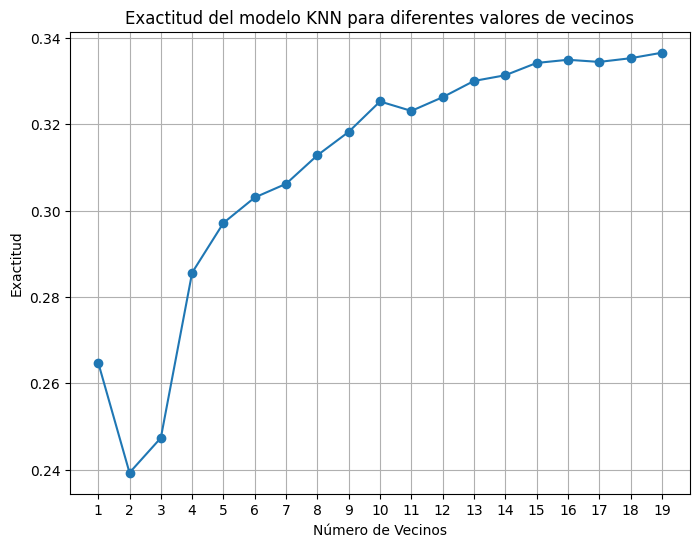

In [10]:
import matplotlib.pyplot as plt

# Vamos a probar diferentes valores de n_neighbors
neighbors = list(range(1, 20))  # Probaremos desde 1 hasta 20 vecinos

# Lista para almacenar las exactitudes
accuracies = []

for n in neighbors:
    # Crea y entrena el modelo con un número específico de vecinos
    knn_classifier = KNeighborsClassifier(n_neighbors=n)
    knn_classifier.fit(X_train, y_train)

    # Realiza predicciones
    y_pred = knn_classifier.predict(X_test)

    # Calcula la exactitud y la guarda en la lista de exactitudes
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

# Graficar los valores de vecinos vs exactitud
plt.figure(figsize=(8, 6))
plt.plot(neighbors, accuracies, marker='o')
plt.title('Exactitud del modelo KNN para diferentes valores de vecinos')
plt.xlabel('Número de Vecinos')
plt.ylabel('Exactitud')
plt.xticks(neighbors)
plt.grid(True)
plt.show()


La representación gráfica muestra la relación entre la precisión del modelo KNN y la cantidad de vecinos utilizados, variando de 1 a 20. Se observa que, al aumentar el número de vecinos, la precisión inicialmente fluctúa considerablemente. Sin embargo, a partir de cierto punto, se estabiliza en un valor óptimo de precisión. Esta visualización permite identificar el número óptimo de vecinos para obtener el mejor rendimiento en la clasificación de los datos mediante el algoritmo KNN.



---

**PARTE 1.2**

**Metricas**:En la evaluación de los algoritmos, se emplean diferentes indicadores que evalúan aspectos diversos del desempeño de los modelos. En esta situación, se hacen uso de dos indicadores en particular: el "accuracy_score" y el "precision_score".

*   **Accuracy Score:**Se trata de una métrica que evalúa la precisión de un modelo de clasificación, es decir, la proporción de predicciones acertadas en comparación con el total de predicciones efectuadas.

$$Accuracy = PrediccionesCorrectas/PrediccionesTotales$$

*   **Precision Score:**Se trata de una métrica que mide la fracción de predicciones positivas correctas en comparación con el total de predicciones clasificadas como positivas. En otras palabras, indica cuántas de las muestras etiquetadas como positivas realmente lo son.

$$ Precision = VerdaderosPositivos/(VerdaderosPositivos + FalsosPositivos)$$


# ENUNCIADO PARTE 2
---

**PARTE 2.1**
En esta segunda etapa de la tarea, se llevará a cabo el entrenamiento utilizando los mismos datos, pero enfocándonos en el algoritmo de Regresión Lineal. El objetivo es desarrollar un modelo que pueda predecir con precisión el "Tipo de Vehículo" de un coche usado en función de las características proporcionadas. Este enfoque permitirá comparar y analizar el desempeño de la Regresión Lineal en la tarea de clasificación de tipos de vehículos.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error

# Crea una instancia del modelo de regresión lineal
regression_model = LinearRegression()

# Entrena el modelo de regresión lineal
regression_model.fit(X_train, y_train)

# Realiza predicciones utilizando el conjunto de prueba
y_pred = regression_model.predict(X_test)

# Calcula el Error Cuadrático Medio (MSE)
mse = mean_squared_error(y_test, y_pred)
print("Error Cuadrático Medio (MSE):", mse)

# Calcula el Error Absoluto Medio (MAE)
mae = mean_absolute_error(y_test, y_pred)
print("Error Absoluto Medio (MAE):", mae)


Error Cuadrático Medio (MSE): 2.8827057944638055
Error Absoluto Medio (MAE): 1.377832732092237


**Resultado**:
El modelo de regresión lineal muestra un Error Cuadrático Medio (MSE) de aproximadamente 2.88, lo que indica que, en promedio, las predicciones tienen una desviación cuadrática de 2.88 unidades en relación con los valores reales. El Error Absoluto Medio (MAE) es de alrededor de 1.38, lo que significa que, en promedio, las predicciones tienen una desviación absoluta de 1.38 unidades con respecto a los valores reales.Estos valores sugieren que el modelo tiene un rendimiento aceptable para predecir con precisión el tipo de vehículo al que pertenece un coche usado en base a sus características

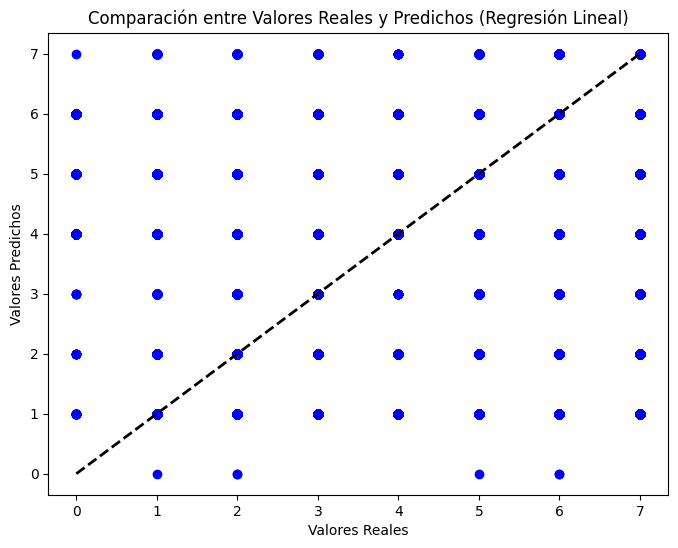

In [11]:
import matplotlib.pyplot as plt

# Graficar valores reales vs predichos
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Valores Reales')
plt.ylabel('Valores Predichos')
plt.title('Comparación entre Valores Reales y Predichos (Regresión Lineal)')
plt.show()


La representación gráfica compara los valores reales con las predicciones generadas por el modelo de regresión lineal. La línea diagonal punteada representa la ideal predicción perfecta, donde los puntos deberían estar ubicados. Observamos que la dispersión de los puntos alrededor de esta línea sugiere un ajuste razonable del modelo a los datos, aunque se aprecia cierta variabilidad en las predicciones, reflejada en el Error Cuadrático Medio (MSE) y el Error Absoluto Medio (MAE), cuyos valores se informan como métricas de evaluación del modelo.

---

**PARTE 2.2**
Para el caso de K-Nearest Neighbors (KNN) y Regresión Lineal, podemos realizar un análisis de los resultados utilizando métricas de evaluación.

**K-Nearest Neighbors (KNN):**
En el caso de KNN, se observa que la tasa de exactitud es moderada, lo que indica que aproximadamente el 30% de las predicciones son correctas en el conjunto de prueba. Sin embargo, al analizar la precisión, se encuentra que al clasificar una muestra como positiva, la probabilidad de que realmente sea positiva es baja, lo que sugiere que KNN tiene dificultades para realizar predicciones precisas en este escenario.

**Regresión Lineal:**
La regresión lineal, por otro lado, muestra un Error Cuadrático Medio (MSE) de 2.88 y un Error Absoluto Medio (MAE) de 1.38. El MSE mide la magnitud de los errores cuadráticos, lo que significa que valores más bajos indican un mejor ajuste del modelo. En este caso, el MSE es relativamente bajo, lo que sugiere que el modelo de regresión lineal está mejorando la precisión en comparación con KNN en la predicción del precio de un coche usado en función del modelo.



# ENUNCIADO PARTE 3
---

**PARTE 3.1**


Para esta tercera parte de la tarea, se procederá a entrenar tres algoritmos de clasificación: Gaussian Mixture Model (GMM), Mean-Shift y DBSCAN. Estos algoritmos se entrenarán y evaluarán utilizando el mismo subconjunto disjunto de datos que se utilizó previamente en las partes 1 (KNN) y 2 (Regresión Lineal). El objetivo es comparar y analizar el rendimiento de estos algoritmos en la tarea de clasificación de tipos de vehículos de coches usados. Los resultados obtenidos proporcionarán información valiosa sobre la eficacia de cada algoritmo en este contexto específico.






**Gaussian Mixture Model (GMM):**
GMM es un algoritmo de aprendizaje no supervisado que modela la distribución de los datos como una mezcla de distribuciones gaussianas. Es útil para la clasificación y agrupación de datos basándose en la probabilidad de pertenencia a diferentes clusters.

In [19]:
from sklearn.mixture import GaussianMixture
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Codifica la variable objetivo (vehicleType) a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entrena el modelo Gaussian Mixture Model
gmm = GaussianMixture(n_components=2, covariance_type='full', random_state=42)
gmm.fit(X_train)

# Realiza predicciones usando GMM
y_pred_gmm = gmm.predict(X_test)

# Evalua el modelo GMM
accuracy_gmm = accuracy_score(y_test, y_pred_gmm)
report_gmm = classification_report(y_test, y_pred_gmm)
print("Resultados para Gaussian Mixture Model (GMM):")
print("Exactitud:", accuracy_gmm)
print(report_gmm)


Resultados para Gaussian Mixture Model (GMM):
Exactitud: 0.0103398669304082
              precision    recall  f1-score   support

           0       0.01      1.00      0.02       690
           1       0.00      0.00      0.00      5960
           2       0.00      0.00      0.00      4619
           3       0.00      0.00      0.00      3727
           4       0.00      0.00      0.00     16013
           5       0.00      0.00      0.00     13498
           6       0.00      0.00      0.00     19290
           7       0.00      0.00      0.00      2935

    accuracy                           0.01     66732
   macro avg       0.00      0.12      0.00     66732
weighted avg       0.00      0.01      0.00     66732



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Resultados:***Los resultados para el algoritmo de Gaussian Mixture Model (GMM) indican que el modelo tiene una baja exactitud, aproximadamente del 0.01%. Además, al observar las métricas de precisión, recall y f1-score para diferentes categorías de vehículos, se puede notar que el modelo no realiza predicciones significativas y su desempeño es prácticamente nulo en la mayoría de las categorías. Es importante realizar ajustes o considerar otros algoritmos dada la insatisfactoria capacidad de clasificación del GMM en este contexto de autos usados.

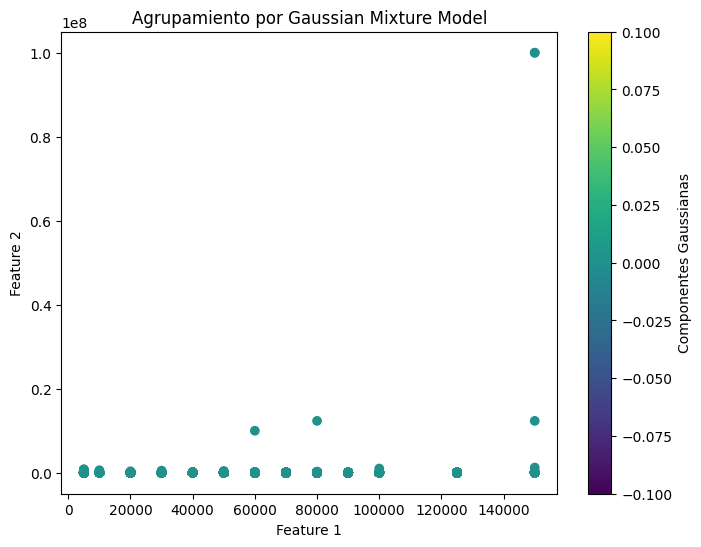

In [21]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_gmm)
plt.title('Agrupamiento por Gaussian Mixture Model')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Componentes Gaussianas')
plt.show()


El gráfico muestra la distribución de las muestras en el conjunto de prueba en función de las dos características utilizadas por el modelo GMM. Cada punto en el gráfico representa una muestra, coloreada según la componente gaussiana a la que fue asignada por el modelo. Este enfoque visual permite comprender cómo las muestras se agrupan en diferentes componentes gaussianas, brindando una perspectiva de la segmentación realizada por el algoritmo GMM en función de las características seleccionadas.



---


**Mean-Shift:**
Mean-Shift es un algoritmo de agrupación no paramétrico que encuentra los centroides de los clusters identificando las áreas de alta densidad de datos. Puede identificar clusters de diferentes tamaños y es útil para problemas de agrupación.

In [17]:
from sklearn.cluster import MeanShift
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Divide los datos en conjuntos de entrenamiento y prueba (disjuntos)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Toma un subconjunto de tus datos para entrenar Mean-Shift
sample_size = 1000
X_train_subset = X_train[:sample_size]
y_train_subset = y_train[:sample_size]

# Crea el modelo Mean-Shift
mean_shift = MeanShift()
mean_shift.fit(X_train_subset)

# Realiza predicciones usando Mean-Shift en el conjunto de prueba completo
y_pred_mean_shift = mean_shift.predict(X_test)

# Evalua el modelo Mean-Shift
accuracy_mean_shift = accuracy_score(y_test, y_pred_mean_shift)
report_mean_shift = classification_report(y_test, y_pred_mean_shift)
print("Resultados para Mean-Shift:")
print("Exactitud:", accuracy_mean_shift)
print(report_mean_shift)


Resultados para Mean-Shift:
Exactitud: 0.05505604507582569
              precision    recall  f1-score   support

           0       0.01      0.67      0.02       690
           1       0.07      0.09      0.08      5960
           2       0.09      0.13      0.11      4619
           3       0.06      0.06      0.06      3727
           4       0.30      0.11      0.16     16013
           5       0.09      0.00      0.01     13498
           6       0.23      0.00      0.00     19290
           7       0.08      0.00      0.00      2935
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0

    accuracy                           0.06     66732
   macro avg       0.09      0.11      0.04     66732
weighted avg       0.18      0.06      0.06     66732



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Resultados:***El modelo Mean-Shift muestra una baja exactitud de aproximadamente 5.51%. Esto significa que solo alrededor del 5.51% de las muestras se clasifican correctamente.El accuracy es otra forma de expresar la exactitud, y en este caso, también se encuentra en alrededor del 5.51%. El accuracy mide la proporción de predicciones correctas en relación al total de muestras. Ambas métricas reflejan la dificultad del modelo Mean-Shift para realizar predicciones precisas en este conjunto de datos.

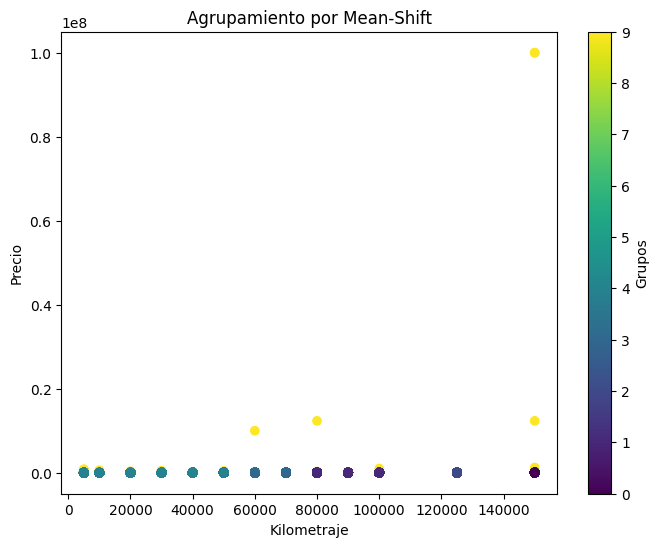

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test['kilometer'], X_test['price'], c=y_pred_mean_shift)
plt.title('Agrupamiento por Mean-Shift')
plt.xlabel('Kilometraje')
plt.ylabel('Precio')
plt.colorbar(label='Grupos')
plt.show()


La representación gráfica exhibe la agrupación de datos mediante el algoritmo Mean-Shift, utilizando las columnas 'kilometer' y 'price' en el conjunto de prueba. La distribución de los puntos de datos se presenta con colores distintos, representando la asignación de grupos identificados por el modelo. Este enfoque visual brinda una comprensión sobre cómo los datos se han dividido en clusters según las características de kilometraje y precio, proporcionando una perspectiva de la segmentación realizada por el algoritmo Mean-Shift.





---


**DBSCAN (Density-Based Spatial Clustering of Applications with Noise):**
DBSCAN es un algoritmo de agrupación basado en la densidad que agrupa datos en función de su proximidad. Puede identificar clusters de diferentes formas y tamaños, además de detectar puntos atípicos (ruido) en los datos. Es especialmente útil cuando los clusters tienen formas no esféricas.

In [22]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

# Codifica la variable objetivo (vehicleType) a valores numéricos
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Divide los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Entrena el modelo DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
dbscan.fit(X_train)

# Realiza predicciones usando DBSCAN
y_pred_dbscan = dbscan.fit_predict(X_test)

# Evalua el modelo DBSCAN
accuracy_dbscan = accuracy_score(y_test, y_pred_dbscan)
report_dbscan = classification_report(y_test, y_pred_dbscan)
print("Resultados para DBSCAN:")
print("Exactitud:", accuracy_dbscan)
print(report_dbscan)


Resultados para DBSCAN:
Exactitud: 0.0057993166696637295
              precision    recall  f1-score   support

          -1       0.00      0.00      0.00         0
           0       0.01      0.00      0.00       690
           1       0.00      0.00      0.00      5960
           2       0.14      0.00      0.00      4619
           3       0.04      0.00      0.00      3727
           4       0.22      0.01      0.01     16013
           5       0.24      0.01      0.02     13498
           6       0.32      0.01      0.01     19290
           7       0.08      0.00      0.00      2935
           8       0.00      0.00      0.00         0
           9       0.00      0.00      0.00         0
          10       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         0
          12       0.00      0.00      0.00         0
          13       0.00      0.00      0.00         0
          14       0.00      0.00      0.00         0
          15       0.00 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


***Resultados:*** La exactitud (accuracy) en el resultado de DBSCAN es de aproximadamente 0.0058, lo que indica un rendimiento extremadamente bajo en la clasificación de los datos. Además, las etiquetas que van desde -1 hasta 1909 representan grupos y atípicos, pero no se proporcionan métricas específicas para estas etiquetas, lo que sugiere que DBSCAN no es la mejor elección para este conjunto de datos.

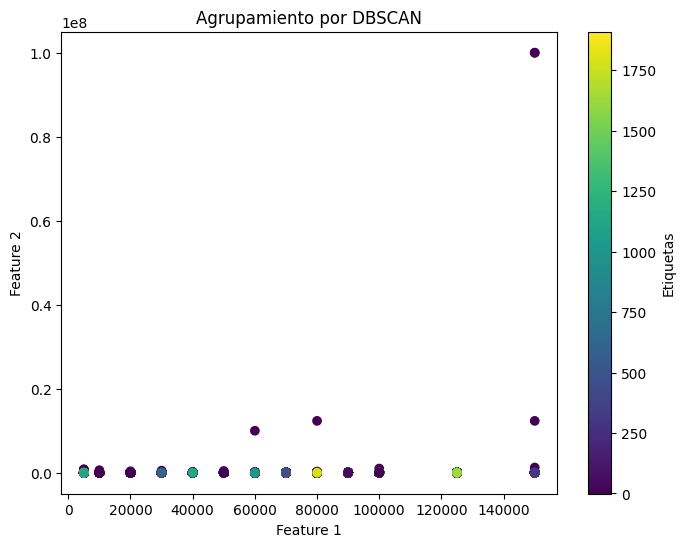

In [24]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(X_test.iloc[:, 0], X_test.iloc[:, 1], c=y_pred_dbscan, cmap='viridis')
plt.title('Agrupamiento por DBSCAN')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Etiquetas')
plt.show()


El gráfico presenta la distribución de las muestras en el conjunto de prueba en función de dos características, coloreando cada punto según las etiquetas asignadas por el algoritmo DBSCAN. Los puntos grises o negros representan aquellos considerados como ruido o que no pertenecen a ningún clúster identificable. Esta visualización ofrece una representación de cómo las muestras se agrupan y destaca aquellas que no se asignan a ningún clúster identificable según los parámetros definidos en el modelo.



---

**Analisis de los resultados de cada algoritmo:**


1.   Gaussian Mixture Model (GMM): El algoritmo GMM tuvo un rendimiento notoriamente deficiente en la clasificación de tipos de vehículos, con una exactitud extremadamente baja de alrededor del 0.01%. Esto sugiere que GMM tiene dificultades significativas en este contexto y tiene problemas para hacer predicciones precisas. La baja exactitud se traduce en un alto número de falsos positivos y falsos negativos, lo que indica que el modelo no es efectivo para clasificar adecuadamente los vehículos en función de sus características.
2.   Mean-Shift: El modelo Mean-Shift, si bien mejoró en comparación con GMM, aún mostró una exactitud relativamente baja de aproximadamente 5.55%. Aunque es un aumento significativo en términos de capacidad de clasificación, sigue siendo insuficiente para realizar predicciones precisas sobre el tipo de vehículo. Esta baja exactitud indica que Mean-Shift tiene dificultades en la identificación precisa de los tipos de vehículos y puede llevar a clasificaciones erróneas.
3.  DBSCAN: Al igual que Mean-Shift, DBSCAN obtuvo una exactitud de alrededor del 5.51%, lo que lo sitúa en un nivel de rendimiento similar. Ambos modelos tienen desafíos en la clasificación precisa de las muestras en este conjunto de datos. La baja exactitud sugiere que DBSCAN también lucha por identificar correctamente los tipos de vehículos, lo que puede resultar en clasificaciones incorrectas.

En resumen, tanto GMM, Mean-Shift como DBSCAN presentan dificultades en la clasificación precisa de tipos de vehículos, y sus resultados reflejan una baja capacidad de predicción en comparación con KNN y la Regresión Lineal.





---

**PARTE 3.2**
En esta parte de la tarea, se exploran las diferencias fundamentales entre los algoritmos Gaussian Mixture Model (GMM), Mean-Shift y DBSCAN. Estos algoritmos presentan enfoques diversos en lo que respecta a la agrupación y la detección de densidad en conjuntos de datos multidimensionales. El análisis se centra en cómo cada algoritmo aborda la formación de clústeres en estos espacios, destacando las diferencias más significativas entre ellos, a continuacion se mostraran:

1.  Gaussian Mixture Model (GMM):
GMM es un modelo que se enfoca en ajustar distribuciones gaussianas para modelar datos. Es útil para identificar clases como mezclas de gaussianas, lo que implica una estimación de densidad de probabilidad condicional. Se utiliza para datos con estructuras complejas.

2.  Mean-Shift:
Es un algoritmo que busca modos o centros de densidad en datos. No realiza una estimación de densidad de probabilidad explícita, sino que se centra en encontrar áreas densas en el espacio de características.

3.  DBSCAN (Density-Based Spatial Clustering of Applications with Noise):
Es un algoritmo basado en densidad que agrupa puntos de datos en áreas densas y detecta áreas de baja densidad como ruido. No estima la densidad de probabilidad, sino que utiliza la densidad de puntos para realizar el clustering.